## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
# this function is given to us

def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
# N = 100 cards, n = 6 players, k = 3 cards per player
cards = sample_cards(100, 6, 3)
cards

array([[68, 74, 90],
       [77, 78, 82],
       [23, 35, 72],
       [39, 45, 98],
       [ 3, 12, 73],
       [43, 50, 71]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([68, 74, 90]), array([77, 78, 82]))

The lowest card in the game is

In [5]:
np.min(cards)

3

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

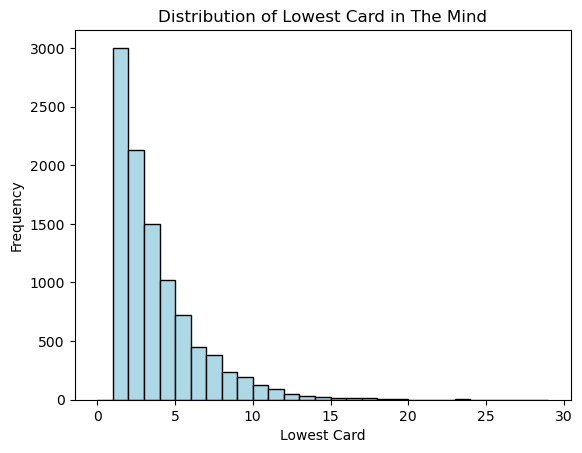

In [7]:
num_runs = 10000

# array holding lowest values in each run
lowest_cards_array = np.zeros(num_runs)

N = 100
n = 10
k = 3

for i in range(num_runs):
    cards = sample_cards(N, n, k)
    lowest_card = np.min(cards)
    lowest_cards_array[i] = lowest_card

# Plot the distribution of the lowest card
# np.arrange(start,end,increment by) - creates an array of values
# np.arrage(0,100,1) - creates an array array with numbers 0-99
plt.hist(lowest_cards_array, bins=np.arange(0,30,1), edgecolor="black", color="lightblue")
plt.title("Distribution of Lowest Card in The Mind")
plt.xlabel("Lowest Card")
plt.ylabel("Frequency")
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

Mean of the Distribution of Largest Gap: 11.306


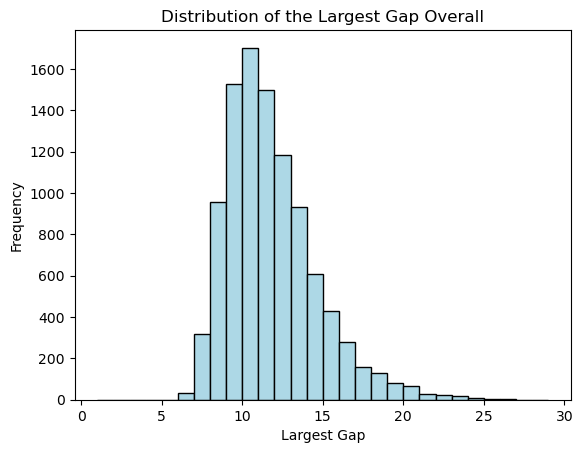

In [8]:
# Find the largest distance overall bt consecutive numbers in the game

# here there are 6 players and each person gets 3 cards - total 18 cards
# out of the 18 cards we find sort 

largest_gaps_array = np.zeros(num_runs)

# Run simulations
for i in range(num_runs):
    cards = sample_cards(N, n, k)  # Sample cards
    flattened_cards = cards.flatten()  # flattens an array of an array to one array 
    sorted_cards = np.sort(flattened_cards)  # Sort the flattened array
    
    # Calculate the gaps between consecutive numbers of the soreted array
    gaps = np.diff(sorted_cards)
    
    # Find the largest gap
    largest_gap = np.max(gaps)
    
    # Store the largest gap in the array
    largest_gaps_array[i] = largest_gap
    
print(f"Mean of the Distribution of Largest Gap: {np.mean(largest_gaps_array)}")

# Plot the distribution of the largest gap
plt.hist(largest_gaps_array, bins=np.arange(1,30,1), edgecolor="black", color="lightblue")
#plt.hist(largest_gaps_array, bins=np.arange(np.min(largest_gaps_array), np.max(largest_gaps_array)+1), edgecolor="black",color="lightblue")
plt.xlabel("Largest Gap")
plt.ylabel("Frequency")
plt.title("Distribution of the Largest Gap Overall")
plt.show()


Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

Mean of the Distribution of Largest Gap: 11.0917


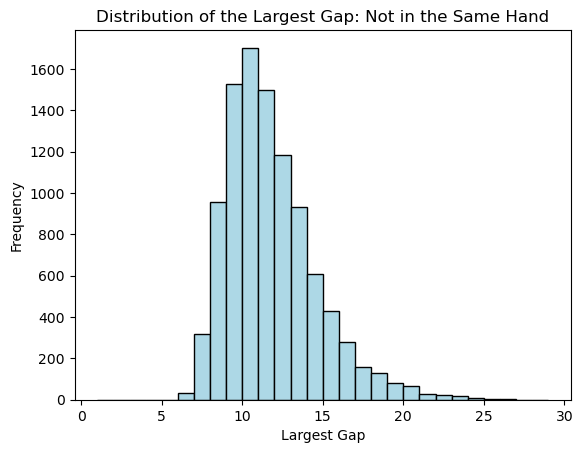

In [9]:
largest_gaps_array_diff = np.zeros(num_runs)

for i in range(num_runs) :
    cards = sample_cards(N, n, k)
    player_ids = np.tile(np.arange(1,n+1),(k,1)).T
    flat_cards, flat_ids = cards.flatten(), player_ids.flatten()
    order_ids = np.argsort(flat_cards)
    flat_cards[order_ids]
    flat_ids[order_ids]
    gap_cards = np.diff(flat_cards[order_ids])
    gap_ids = np.diff(flat_ids[order_ids])
    gaps_unique = gap_cards * (gap_ids != 0)
    gaps_unique
    largest_gaps_array_diff[i] = np.max(gaps_unique)

print(f"Mean of the Distribution of Largest Gap: {np.mean(largest_gaps_array_diff)}")

#plt.hist(largest_gaps_array, bins=np.arange(np.min(largest_gaps_array), np.max(largest_gaps_array)+1), edgecolor="black",color="lightblue")
plt.hist(largest_gaps_array, bins=np.arange(1,30,1), edgecolor="black", color="lightblue")
plt.xlabel("Largest Gap")
plt.ylabel("Frequency")
plt.title("Distribution of the Largest Gap: Not in the Same Hand")
plt.show()

In [10]:
# To Do cell
# show that the mean is always smaller for when you're looking for the largest gap between two players not in the same hand
print(f"Mean of the Distribution of Largest Gap: {np.mean(largest_gaps_array)}")
print(f"Mean of the Distribution of Largest Gap (not in same hand): {np.mean(largest_gaps_array_diff)}")

# For different values of n (# of players), we observe that the mean is always smaller between any two players
# not in the same hand. This suggests that

Mean of the Distribution of Largest Gap: 11.306
Mean of the Distribution of Largest Gap (not in same hand): 11.0917


### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

Theoretical p: 0.17999999999999983


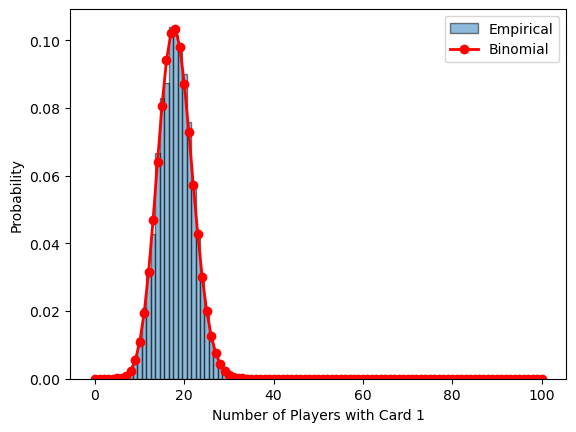

In [13]:
# Define parameters
N = 100  # Total number of cards
n = 6    # Number of players
k = 3    # Number of cards per player
x = 1    # Specific card number you are interested in
trials = 100  # Number of game simulations

# Define the has_card_x function as you have defined it

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def has_card_x(player_cards, x):
    return x in player_cards

def simulate_games(N, n, k, x, trials):
    successes = []  # Initialize the list to store success counts for one simulation
    for i in range(trials):
        game_cards = sample_cards(N, n, k)
        success_count = np.sum([has_card_x(player_cards, x) for player_cards in game_cards])
        successes.append(success_count)
    return successes

def simulate_bin(N, n, k, x, trials, num_runs):
    total_successes = []  # Initialize the list to store total successes for each simulation
    for _ in range(num_runs):
        # Call the simulate_games function and store the results
        simulation_results = simulate_games(N, n, k, x, trials)
        total_successes.append(sum(simulation_results))  # Append the sum of successes for one simulation
    
    return total_successes

# Simulate games 1000 times and store the results in total_successes
num_runs = 10000
total_successes = simulate_bin(N, n, k, x, trials, num_runs)

prob = [ts/100 for ts in total_successes]
p = np.mean(prob)
#print(total_successes)

bin_edges = np.arange(N+2) - 0.5

# Plot the empirical distribution
plt.hist(total_successes, bins=bin_edges, density=True, alpha=0.5, label='Empirical', edgecolor='k')

# Calculating theoretical p
theoretical_p = 1 - (99/100*98/99*97/98*96/97*95/96*94/95*93/94*92/93*91/92*90/91*89/90*88/89*87/88*86/87*85/86*84/85*83/84*82/83)
print(f"Theoretical p: {theoretical_p}")

# Plot the binomial distribution
binom_dist = binom(N, theoretical_p)
x_values = np.arange(N+1)
plt.plot(x_values, binom_dist.pmf(x_values), 'ro-', label='Binomial', linewidth=2)

plt.xlabel('Number of Players with Card ' + str(x))
plt.ylabel('Probability')
plt.legend()
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

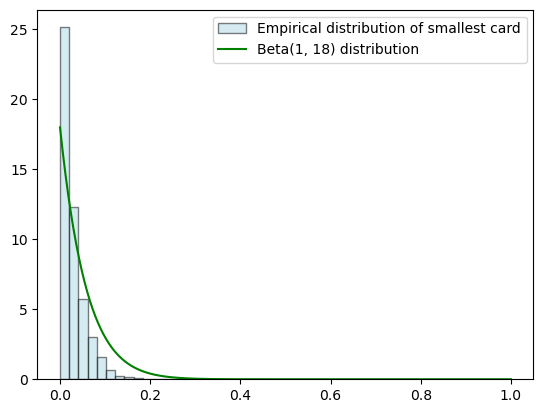

In [14]:
# To Do cell
from scipy.stats import beta

# fall within [0,1] range to compare with Beta
normalized_smallest = np.array(lowest_cards_array) / N

# Generate values from Beta(1, k) for comparison
# creates an array x of 100 evenly spaced values between 0 and 1 
x = np.linspace(0, 1, 1000)
# alpha = 1 (looking for 1st order statistic) and Beta = n*k
y = beta.pdf(x, 1, (n*k)+1-1)

# Plot histograms of smallest card distribution and Beta(1,k) distribution
plt.hist(normalized_smallest, bins=np.linspace(0,np.max(x),50),density=True, alpha=0.5, edgecolor="black", color = "lightblue", label="Empirical distribution of smallest card")
plt.plot(x, y, 'g-', label=f'Beta(1, {n*k}) distribution')
plt.legend()
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

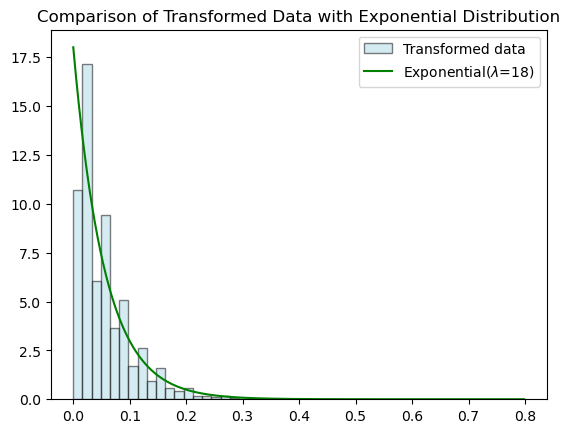

In [15]:
from scipy.stats import expon

transform_lowest_cards = np.zeros(num_runs)

for i in range(num_runs):
    cards = sample_cards(N, n, k)
    lowest_card = np.min(cards)
    transform_card = -np.log(1 - lowest_card/N)
    transform_lowest_cards[i] = transform_card

# exponential distribution is 1/lambda where lambda is the parameter
# lambda = n*k
param = 1/(n*k)
    
x = np.linspace(0, max(transform_lowest_cards), 1000)
y = expon.pdf(x, scale=param)  # Scale is 1/lambda for the exponential distribution

plt.hist(transform_lowest_cards, bins=np.linspace(0,np.max(x),50), density=True, alpha=0.5, edgecolor="black", color = "lightblue", label="Transformed data")
plt.plot(x, y, 'g-', label=f'Exponential($\lambda$={n*k})')
plt.legend()
plt.title("Comparison of Transformed Data with Exponential Distribution")
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Lauren Murai (lmurai)
- Member No2: Aarushi Somani (aarushi-somani-19)
- Member No3: Grayson Meckfessel (graysonmeckfessel)